In [1]:
import pandas as pd

# Example production dataset
data = {
    "date": pd.date_range("2020-01-01", periods=24, freq="ME"),
    "oil_rate": [1200, 1150, 1100, 1050, 1000, 960, 920, 880, 850, 820, 790, 760,
                 730, 710, 690, 670, 650, 640, 620, 600, 590, 580, 570, 560],
    "gas_rate": [5000, 4950, 4900, 4820, 4750, 4680, 4600, 4530, 4460, 4390, 4320, 4260,
                 4190, 4120, 4060, 4000, 3940, 3880, 3820, 3760, 3710, 3660, 3610, 3560],
    "water_rate": [100, 120, 140, 160, 180, 210, 240, 280, 320, 370, 420, 470,
                   520, 580, 640, 700, 760, 820, 880, 940, 1000, 1070, 1140, 1210],
    "cum_oil": pd.Series([1200, 2350, 3450, 4500, 5500, 6460, 7380, 8260, 9110, 9930, 10720, 11500,
                          12230, 12940, 13630, 14300, 14950, 15590, 16210, 16810, 17400, 17980, 18550, 19110]),
    "well_status": ["flowing"]*18 + ["shut-in"]*2 + ["flowing"]*4
}

df = pd.DataFrame(data)
print(df.head())

        date  oil_rate  gas_rate  water_rate  cum_oil well_status
0 2020-01-31      1200      5000         100     1200     flowing
1 2020-02-29      1150      4950         120     2350     flowing
2 2020-03-31      1100      4900         140     3450     flowing
3 2020-04-30      1050      4820         160     4500     flowing
4 2020-05-31      1000      4750         180     5500     flowing


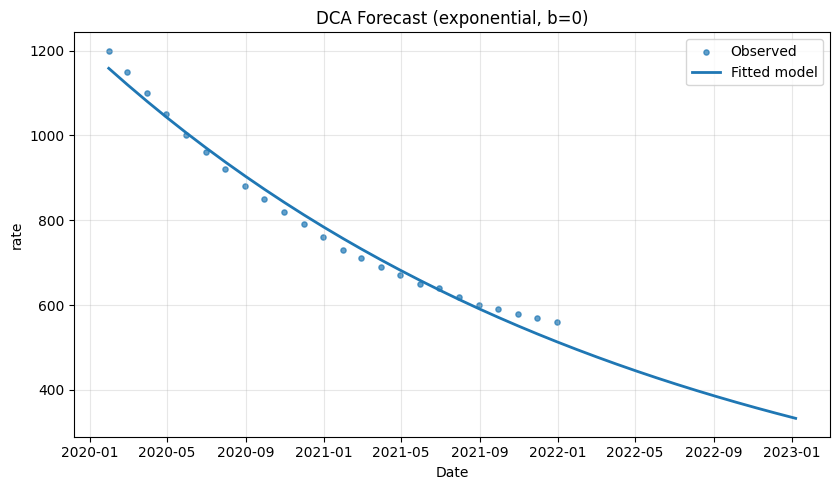

<Axes: title={'center': 'DCA Forecast (exponential, b=0)'}, xlabel='Date', ylabel='rate'>

In [9]:
from prodpy._decline import DCA

# Choose which columns describe time and rate in the Outlook table
date_col = "date"
rate_col = "oil_rate"

if date_col not in df or rate_col not in df:
    raise KeyError(f"Update `date_col`/`rate_col` to match: {list(df.columns)}")

# Clean up the inputs before fitting
decline_input = (
    df[[date_col, rate_col]]
    .rename(columns={date_col: "date", rate_col: "rate"})
    .dropna(subset=["date", "rate"])
)
decline_input["date"] = pd.to_datetime(decline_input["date"])
decline_input["rate"] = pd.to_numeric(decline_input["rate"], errors="coerce")
decline_input = decline_input.dropna(subset=["rate"]).sort_values("date")

dca = DCA(decline_input).fit(model="exponential")

dca.plot(horizon_days=365)